In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from datetime import datetime
import pickle
import bz2


In [3]:
DATA_ROOT = '/media/gustavo/Storage/Datasets/Onion20k'
DATA_ROOT_URL=Path(DATA_ROOT)

# Exploring songs from lfm2b with spotify features

In [24]:
LFM_DATA_FILE = Path(DATA_ROOT)/'music4all.json.bz2'
lfm_data= pd.read_json(LFM_DATA_FILE,lines=True)
id2lfm = pickle.load(bz2.open(DATA_ROOT_URL/'track_ids-to-index.pkl.bz2',mode='rb'))

In [123]:
lfm_data.head()

,_id,artist,track,album,lfm,spotify
0,0009fFIM1eYThaPg,Cheryl,Rain on Me,3 Words,"{'track_id': 32553818, 'artist_id': 850845, 'a...","{'uri': '3eObKIfHKJ1nAPh0wTxFCc', 'features': ..."
1,0010xmHR6UICBOYT,Oddisee,After Thoughts,The Beauty in All,"{'track_id': 3947719, 'artist_id': 3049364, 'a...","{'uri': '27szvF97Tu95GxN98N52fy', 'features': ..."
2,002Jyd0vN4HyCpqL,Blue Öyster Cult,ME 262,Secret Treaties,"{'track_id': 25225652, 'artist_id': 648169, 'a...","{'uri': '273lBFpxUCwisTpdnF9cVb', 'features': ..."
3,006TYKNjNxWjfKjy,Rhapsody,Flames of Revenge,Legendary Years (Re-Recorded),"{'track_id': 15264706, 'artist_id': 3410635, '...","{'uri': '7FARxq6SoJNKByv82HFXs3', 'features': ..."
4,007LIJOPQ4Sb98qV,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"{'track_id': 28794945, 'artist_id': 3985133, '...","{'uri': '6rVxJ3sN3Cz40MSLavbG1K', 'features': ..."


In [27]:
lfm_data['_id'].apply(lambda x:id2lfm.get(x)).isna().sum()

84861

In [26]:
track_sample_data = lfm_data.iloc[25]

In [27]:
track_sample_data['lfm']

{'track_id': 6240589,
 'artist_id': 3571504,
 'album_id': 12068562,
 'tags': {'2010': 34,
  'pop': 100,
  'female vocalists': 100,
  'singer-songwriter': 100,
  'pop rock': 100,
  'Mellow': 100,
  'female vocalist': 100,
  'rock': 67,
  'alternative': 67,
  'folk': 67,
  'downtempo': 67,
  'acoustic': 67,
  'Rainy Day': 67,
  'alternative pop': 67,
  '2010s': 67,
  'sara bareilles': 67,
  'dysfunction': 67,
  'basket case': 67,
  'indie': 34,
  'soul': 34,
  'piano': 34,
  'american': 34,
  'melancholy': 34,
  'Adult Alternative': 34,
  'great lyrics': 34,
  '8 of 10 stars': 34,
  '10s': 34,
  'Songs Seen Live': 34,
  'repeatrepeatrepeat': 34,
  'wistful': 34,
  'lavender': 34,
  'modern romance': 34,
  'perversely hopeful': 34,
  'pure beautiful': 34,
  'I love this song so much it hurts': 34,
  'love and beauty are bittersweet': 34,
  'floored me the first time I heard it': 34,
  'i stood there on a chair and watched you pray': 34,
  'terrible things i did to her in her dreams': 34,


In [28]:
track_sample_data['spotify']

{'uri': '7AXUdQmZMA5u221iv6gB0m',
 'features': {'danceability': 0.427,
  'energy': 0.273,
  'key': 2,
  'loudness': -10.127,
  'mode': 1,
  'speechiness': 0.030600000000000002,
  'acousticness': 0.794,
  'instrumentalness': 1.4900000000000001e-05,
  'liveness': 0.095,
  'valence': 0.426,
  'tempo': 76.196,
  'type': 'audio_features',
  'duration_ms': 251286,
  'time_signature': 4}}

In [5]:
lfm_data.shape

(109269, 6)

In [54]:
lfm_data.set_index('_id',inplace=True)

In [98]:
lfm_data = pd.concat([lfm_data,lfm_data.iloc[:,3].apply(lambda x: pd.Series(x))],axis=1)
#type(lfm_data['lfm'].values[0])


In [101]:
id2lfm=lfm_data.loc[:,'track_id'],

In [102]:
id2lfm.to_pickle(DATA_ROOT_URL/'full_id2lfm.pkl')

In [81]:
lfm_data[lfm_data['lfm'].notna()]['lfm'].apply()


,_id,artist,track,album,lfm,spotify
0,0009fFIM1eYThaPg,Cheryl,Rain on Me,3 Words,"{'track_id': 32553818, 'artist_id': 850845, 'a...","{'uri': '3eObKIfHKJ1nAPh0wTxFCc', 'features': ..."
1,0010xmHR6UICBOYT,Oddisee,After Thoughts,The Beauty in All,"{'track_id': 3947719, 'artist_id': 3049364, 'a...","{'uri': '27szvF97Tu95GxN98N52fy', 'features': ..."
2,002Jyd0vN4HyCpqL,Blue Öyster Cult,ME 262,Secret Treaties,"{'track_id': 25225652, 'artist_id': 648169, 'a...","{'uri': '273lBFpxUCwisTpdnF9cVb', 'features': ..."
3,006TYKNjNxWjfKjy,Rhapsody,Flames of Revenge,Legendary Years (Re-Recorded),"{'track_id': 15264706, 'artist_id': 3410635, '...","{'uri': '7FARxq6SoJNKByv82HFXs3', 'features': ..."
4,007LIJOPQ4Sb98qV,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"{'track_id': 28794945, 'artist_id': 3985133, '...","{'uri': '6rVxJ3sN3Cz40MSLavbG1K', 'features': ..."
...,...,...,...,...,...,...
109264,zzx8CWdM7qkxKQpC,Ted Leo and the Pharmacists,Counting Down the Hours,Shake the Sheets,"{'track_id': 10289987, 'artist_id': 3935555, '...","{'uri': '02ePLmR1A5hSSkIuD2S3Zq', 'features': ..."
109265,zzyb5LvKJTWLVnrk,Tim Maia,Imunização Racional (Que Beleza),Racional (Vol 1),"{'track_id': 20394531, 'artist_id': 4152444, '...","{'uri': '3w5txx0rNgTf3H5ZitlQgL', 'features': ..."
109266,zzyyPUs7hC9Nz2e1,Frank Carter & The Rattlesnakes,Vampires,Modern Ruin,"{'track_id': 43191408, 'artist_id': 1575856, '...","{'uri': '6IW5yPlWJYmXxRuuc7QkMx', 'features': ..."
109267,zzz0n04uuTUA7fNh,Justin Bieber,Heartbreaker,Journals,"{'track_id': 18022789, 'artist_id': 2201235, '...","{'uri': '21pCToQdqcPi879auxjxKe', 'features': ..."


# Exploring Emma dataset 

In [4]:
gems=pd.concat([
    pd.read_csv(Path(DATA_ROOT)/'GEMS-INN_2023-04-18.csv',encoding='latin-1'),
    pd.read_csv(Path(DATA_ROOT)/'GEMS-INN_2023-04-18-2.csv',encoding='latin-1')
],ignore_index=True).iloc[:,1:]

In [5]:
gems.describe()

,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness,Sublimity,Vitality,Unease,ICC,Familiarity,Liking
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,13.282973,9.536189,13.177081,9.475270,15.062568,19.696595,12.221919,8.125811,3.240432,24.179622,20.956297,9.510676,0.801324,2.337135,3.135108
std,6.083649,5.477793,9.107891,7.656722,10.190680,10.582911,8.896966,6.712502,4.928396,7.416795,9.873094,6.032500,0.165343,1.034525,0.508706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.150000,1.460000,0.000000,-0.250000,1.000000,1.740000
25%,8.890000,5.280000,5.180000,3.230000,7.130000,11.500000,5.050000,3.380000,0.000000,18.950000,12.600000,5.130000,0.760000,1.450000,2.760000
50%,13.215000,8.605000,12.455000,7.745000,13.200000,18.535000,10.590000,6.275000,1.390000,24.565000,21.130000,7.940000,0.850000,1.980000,3.170000
75%,16.710000,13.160000,19.120000,13.880000,20.400000,26.670000,18.010000,11.250000,4.180000,29.840000,27.860000,12.430000,0.910000,3.100000,3.520000
max,37.210000,32.160000,40.710000,34.970000,48.160000,51.040000,47.340000,34.790000,29.940000,40.160000,44.900000,31.050000,0.970000,4.730000,4.360000


In [6]:
gems.head()

,artist,title,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness,Sublimity,Vitality,Unease,ICC,Familiarity,Liking
0,Trailerpark,Schlechter Tag,15.65,19.68,3.54,5.30,5.08,22.33,2.35,11.20,0.00,18.50,21.15,10.50,0.65,2.00,3.17
1,Desiigner,Panda,24.69,4.69,0.78,9.30,7.92,28.26,22.73,9.33,1.06,19.39,30.32,8.91,0.76,4.25,3.83
2,NAS,Doo Rags,24.43,18.57,14.29,19.88,17.55,24.67,27.48,0.00,2.50,33.45,36.15,2.11,0.58,2.08,4.00
3,DMX,X Gon' Give It To Ya,17.27,7.05,9.89,8.60,9.52,37.27,37.77,0.00,0.73,26.05,40.19,0.61,0.86,3.91,4.18
4,Xatar,Meine Große Liebe,6.46,15.86,0.00,9.27,0.67,13.86,15.98,3.79,0.00,19.42,19.77,3.38,0.52,2.00,2.64


<AxesSubplot:>

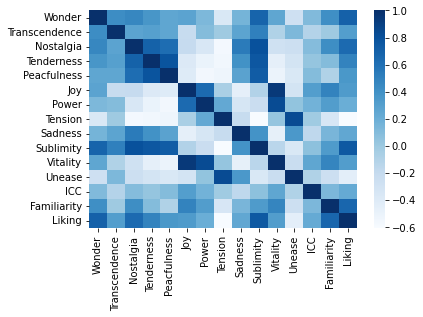

In [7]:
sns.heatmap(gems.corr(),cmap='Blues')

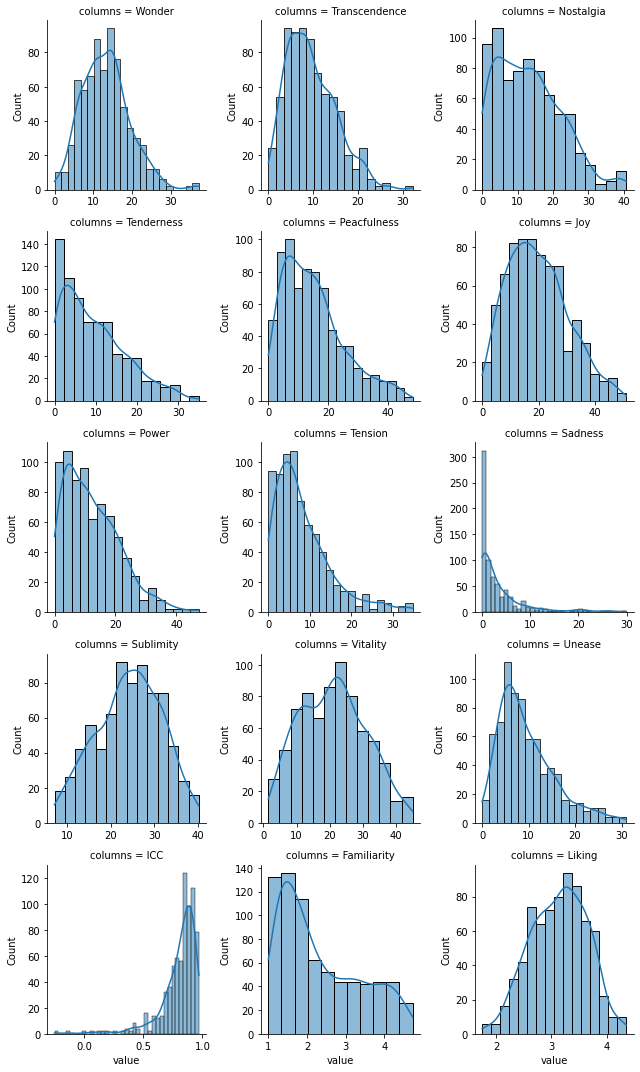

In [8]:

dfm = gems.iloc[:,2:].melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns',col_wrap=3 ,sharey=False, sharex=False)
g = g.map(sns.histplot, 'value',kde=True)

In [21]:
emma_database_merge=gems.merge(lfm_data,right_on=['artist','track'],left_on=['artist','title'],how='inner').drop_duplicates(subset=['artist','track'])

emo_label=pd.read_csv(Path(DATA_ROOT)/'emotions_familiarity_unpacked_labels.tsv')
emma_database_merge= emma_database_merge.merge(emo_label,left_on='_id',right_on='id',how='inner')

In [22]:
emma_database_merge

,artist,title,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,...,lfm_id,power,tenderness,transcendence,wonder,joyful activation,tension,nostalgia,sadness,peacefulness
0,Salt-N-Pepa,Shoop,10.04,7.39,4.87,3.14,8.91,38.19,18.51,2.96,...,7027,0.000000,0.000000,0.173913,0.000000,0.652174,0.000000,0.173913,0.000000,0.000000
1,Eminem,Mockingbird,14.65,5.56,22.60,9.60,7.93,7.61,5.83,10.42,...,19901,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.866667,0.000000
2,Eminem,Rap God,18.78,14.83,9.07,6.10,4.96,23.83,21.32,17.40,...,8226,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Eminem,Lose Yourself,17.40,10.07,17.54,7.78,10.52,31.21,24.18,10.22,...,10295,0.363636,0.000000,0.181818,0.000000,0.181818,0.272727,0.000000,0.000000,0.000000
4,Kanye West,Runaway,8.32,1.64,6.76,7.10,8.67,16.82,3.95,14.91,...,195,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.142857,0.428571,0.000000
5,50 Cent,In Da Club,9.26,4.18,9.81,3.31,10.30,35.35,16.79,7.59,...,2305,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
6,OutKast,B.O.B.,6.12,9.10,3.08,0.16,6.88,31.78,22.06,17.61,...,11599,0.320000,0.000000,0.000000,0.000000,0.600000,0.080000,0.000000,0.000000,0.000000
7,50 Cent,Candy Shop,7.23,1.94,12.66,15.27,4.45,33.57,20.87,3.15,...,14777,0.000000,0.130435,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000
8,2Pac,Keep Ya Head Up,4.90,6.02,5.52,4.90,19.81,13.66,5.89,3.60,...,2624,0.000000,0.000000,0.888889,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000
9,OutKast,Ms. Jackson,14.37,3.35,22.09,1.23,2.43,24.52,9.15,6.83,...,23451,0.000000,0.000000,0.214286,0.142857,0.285714,0.000000,0.357143,0.000000,0.000000


In [10]:
emo_label=pd.read_csv(Path(DATA_ROOT)/'emotions_familiarity_unpacked_labels.tsv',sep=',')

In [18]:
emma_database_merge.to_csv(DATA_ROOT_URL/'emma_database_merge.csv')

In [30]:
emma_database_merge.columns

Index(['artist', 'title', 'Wonder', 'Transcendence', 'Nostalgia', 'Tenderness',
       'Peacfulness', 'Joy', 'Power', 'Tension', 'Sadness', 'Sublimity',
       'Vitality', 'Unease', 'ICC', 'Familiarity', 'Liking', '_id', 'track',
       'album', 'lfm', 'spotify', 'id', '(tag, weight)', 'gems',
       'gems_profile', 'genre', 'microgenre', 'lfm_id', 'power', 'tenderness',
       'transcendence', 'wonder', 'joyful activation', 'tension', 'nostalgia',
       'sadness', 'peacefulness'],
      dtype='object')

#  Exploring emotions file

In [33]:
emo_files=pd.read_csv(Path(DATA_ROOT)/'emotions_familiarity.tsv',sep='\t')
id2lfm = pickle.load(bz2.open(DATA_ROOT_URL/'track_ids-to-index.pkl.bz2',mode='rb'))


In [34]:
emo_files['lfm_id']= emo_files.loc[:,'id'].apply(lambda x:id2lfm.get(x))

In [35]:
emo_files[emo_files['lfm_id'].isna()]

,id,"(tag, weight)",gems,gems_profile,genre,microgenre,lfm_id


In [20]:
emo_files.dropna(subset=['lfm_id'],inplace=True)
emo_files['lfm_id'] =emo_files['lfm_id'].astype(int)

In [65]:
audio_feat = emo_files.merge(lfm_data,left_on='id',right_on='_id',how='inner').dropna(subset="spotify")
spotify_features=audio_feat['spotify'].apply(lambda x: pd.Series(x))
spotify_features=spotify_features['features'].apply(lambda x: pd.Series(x))

In [ ]:
lfm_listening_counts=audio_feat['lfm'].apply(lambda x:pd.Series(x))['listening_count']
lfm_listening_counts.to_csv(DATA_ROOT_URL/'lfm_listening_counts.csv')

In [80]:
merged_emotion_file = emo_files.merge(spotify_features,left_on='lfm_id',right_index=True)
merged_emotion_file[['lfm_id']+ list(spotify_features.columns[:-1])].to_csv(DATA_ROOT_URL/'emotion_audiofeatures.csv')

In [21]:
emo_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24408 entries, 0 to 24407
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             24408 non-null  object
 1   (tag, weight)  24408 non-null  object
 2   gems           24408 non-null  object
 3   gems_profile   24408 non-null  object
 4   genre          24408 non-null  object
 5   microgenre     24408 non-null  object
 6   lfm_id         24408 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [12]:
emo_files.iloc[0,3] 

"{'power': 1.0}"

In [22]:
gems_labels=emo_files.iloc[:,3].apply(lambda x : pd.Series(eval(x))).fillna(0.0)

In [14]:
print('Sparsity of gems_profile per column')
print('===================================')
np.sum(gems_labels==0)/len(gems_labels)


Sparsity of gems_profile per column


power                0.680515
tenderness           0.934530
transcendence        0.536382
wonder               0.685841
joyful activation    0.618035
tension              0.899418
nostalgia            0.653474
sadness              0.749222
peacefulness         0.739798
dtype: float64

In [15]:
# Saving unpacked gems_profile df
pd.concat([emo_files, gems_labels],axis=1).to_csv(Path(DATA_ROOT)/'emotions_familiarity_unpacked_labels.tsv',index=False)

In [34]:
demo = emo_files.iloc[:10,3].apply(lambda x : [[k,v] for k,v in eval(x).items()])

In [16]:
gem_labels_stacked=emo_files.iloc[:,3].apply(lambda x : pd.Series(eval(x))).stack(dropna=True)

In [17]:
gem_labels_stacked.index.set_names(['id','gem_label'],inplace=True)
gem_labels_stacked.name='score'

In [18]:
gem_labels_stacked

id     gem_label        
0      power                1.000000
1      tenderness           1.000000
2      transcendence        1.000000
3      power                0.571429
       wonder               0.285714
                              ...   
24406  power                0.233333
       wonder               0.366667
       joyful activation    0.266667
       sadness              0.133333
24407  nostalgia            1.000000
Name: score, Length: 61088, dtype: float64

In [19]:
gem_labels_stacked=gem_labels_stacked.to_frame()

In [20]:
type(gem_labels_stacked)

pandas.core.frame.DataFrame

In [21]:
merged = gem_labels_stacked.merge(emo_files,left_on='id',right_index=True,how='left',suffixes=['_l',''])
merged.index.rename(names=['row_id','gem_label'] ,inplace=True)

In [22]:
merged.reset_index().to_pickle(DATA_ROOT_URL/'emotions_familiarity_stacked_labels.pkl')

## Plotting correlation among unstacked gems_profile weights

<AxesSubplot:>

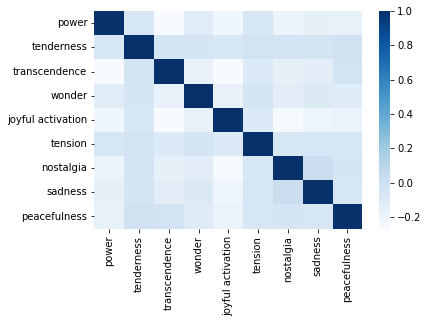

In [114]:

sns.heatmap(gems_labels.corr(),cmap='Blues')

## Plotting distribution among gems_profile weights

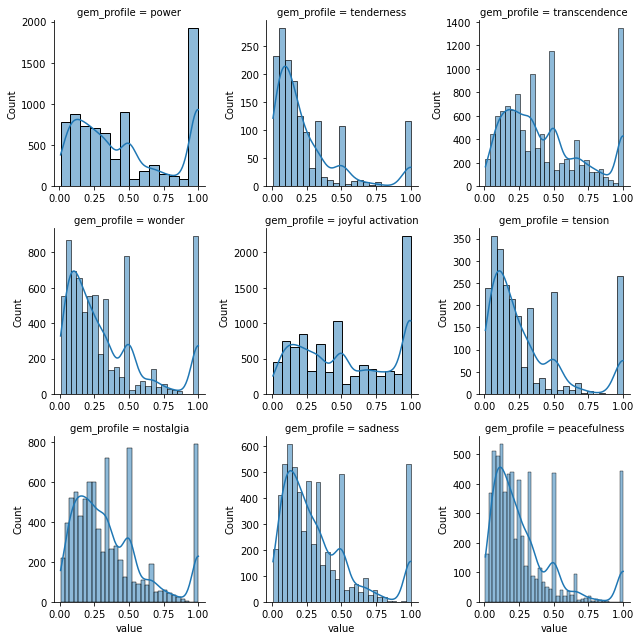

In [27]:
dfm = gems_labels.melt(var_name='gem_profile')
g = sns.FacetGrid(dfm[dfm['value']>0.0], col='gem_profile',col_wrap=3 ,sharey=False,sharex=False)
g = g.map(sns.histplot, 'value',kde=True)

In [26]:
dfm[dfm['value']>0.0]

,gem_profile,value
0,power,1.000000
3,power,0.571429
7,power,0.025424
11,power,0.500000
13,power,1.000000
...,...,...
219646,peacefulness,0.250000
219648,peacefulness,0.200000
219650,peacefulness,0.400000
219661,peacefulness,0.342857


## Release dates

In [25]:
release_dates = pd.read_csv(DATA_ROOT_URL/'release_dates.tsv',sep='\t')

In [26]:
release_dates.head()

,track_uri,date,date_prec,id,"(tag, weight)",gems,genre,microgenre
0,6lfxq3CG4xtTiEg7opyCyx,2018-08-10,day,JOV2uFYNVRxLBlme,NaN,NaN,NaN,NaN
1,487OPlneJNni3NWC8SYqhW,2012-11-12,day,CJjLRi8WG5zvK5d6,"{'indie': 100, 'pop': 82, 'love at first liste...","['wonder', 'transcendence', 'tenderness', 'nos...",pop,indie pop
2,4VyrxHIpMHb4hIKfl8VxhD,2012-08-07,day,rlMcTiHz9HSidm55,NaN,NaN,NaN,NaN
3,4q2DkSsZ51qI9Jq1hA5gwT,2016-09-02,day,LqXCfvHTShC1Ty6i,NaN,NaN,NaN,NaN
4,67nZEOZ5re0q0IueyF1dKc,1974,year,5B8MEDFsAUufCkyP,NaN,NaN,NaN,NaN


In [27]:
len(release_dates)

64391

In [28]:
unpacked_gems_profile = pd.read_csv(DATA_ROOT_URL / 'emotions_familiarity_unpacked_labels.tsv')
stacked_gems_profile = pd.read_pickle(DATA_ROOT_URL / 'emotions_familiarity_stacked_labels.pkl')

In [29]:
full_data_tracks = unpacked_gems_profile.merge(release_dates, left_on='id',right_on='id',how='inner',suffixes=['','_r'])[list(unpacked_gems_profile.columns) +['date','date_prec']].dropna()
full_data_tracks['year']=full_data_tracks.loc[:,'date'].apply(lambda x:int(x.split("-")[0]))
full_data_tracks['month']=full_data_tracks.loc[:,'date'].apply(lambda x:int(x.split("-")[1]) if len(x.split('-'))>1 else 1)
full_data_tracks['day']=full_data_tracks.loc[:,'date'].apply(lambda x:int(x.split("-")[2]) if len(x.split('-'))>2 else 1)
full_data_tracks['release_date']=[datetime(row[0],row[1],row[2]) for row in full_data_tracks.loc[:,['year','month','day']].values]
full_data_tracks.to_csv(DATA_ROOT_URL/'emotions_familiarity_full_feat.tsv',sep='\t',index=False)

In [30]:
full_data_tracks = stacked_gems_profile.merge(release_dates, left_on='id',right_on='id',how='inner',suffixes=['','_r'])[list(stacked_gems_profile.columns) +['date','date_prec']].dropna()
full_data_tracks['year']=full_data_tracks.loc[:,'date'].apply(lambda x:int(x.split("-")[0]))
full_data_tracks['month']=full_data_tracks.loc[:,'date'].apply(lambda x:int(x.split("-")[1]) if len(x.split('-'))>1 else 1)
full_data_tracks['day']=full_data_tracks.loc[:,'date'].apply(lambda x:int(x.split("-")[2]) if len(x.split('-'))>2 else 1)
full_data_tracks['release_date']=[datetime(row[0],row[1],row[2]) for row in full_data_tracks.loc[:,['year','month','day']].values]
full_data_tracks.to_csv(DATA_ROOT_URL/'emotions_familiarity_full_feat_stack.tsv',sep='\t',index=False)

In [21]:
full_data_tracks = pd.read_csv(DATA_ROOT_URL/'emotions_familiarity_full_feat.tsv',sep='\t')

In [22]:
full_data_tracks['date_prec'].value_counts()

day      14070
year      2387
month       83
Name: date_prec, dtype: int64

In [24]:
full_data_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16540 entries, 0 to 16539
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16540 non-null  object 
 1   (tag, weight)      16540 non-null  object 
 2   gems               16540 non-null  object 
 3   gems_profile       16540 non-null  object 
 4   genre              16540 non-null  object 
 5   microgenre         16540 non-null  object 
 6   power              16540 non-null  float64
 7   tenderness         16540 non-null  float64
 8   transcendence      16540 non-null  float64
 9   wonder             16540 non-null  float64
 10  joyful activation  16540 non-null  float64
 11  tension            16540 non-null  float64
 12  nostalgia          16540 non-null  float64
 13  sadness            16540 non-null  float64
 14  peacefulness       16540 non-null  float64
 15  date               16540 non-null  object 
 16  date_prec          165

In [234]:
full_data_stacked_tracks = pd.read_csv(DATA_ROOT_URL/'emotions_familiarity_full_feat_stack.tsv',sep='\t')

In [236]:
full_data_stacked_tracks['date_prec'].value_counts()

day      34604
year      5762
month      171
Name: date_prec, dtype: int64